## MCut vs Normalized Graph Cut for Newsgroup Dataset(NG1/NG2 Balanced Dataset)

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [3]:
porter_stemmer = PorterStemmer()  # Function to stemmize the words

### Data Preprocessing

In [4]:
df_atheism=pd.read_csv('atheismfilename.csv') # Dataframe that stores 1000 filenames of Atheism dataset in 5 column ,each column consisting of 200 

In [5]:
df_atheism.head()    

,A,B,C,D,E
0,53127,54233,54190,54160,53486
1,53629,53635,54482,53532,53325
2,53180,53133,53677,51126,54161
3,53577,53514,53755,51209,53331
4,53228,53556,53329,53466,53204


In [6]:
df_graphics=pd.read_csv('graphicsfilename.csv')

In [7]:
df_graphics.head()

,A,B,C,D,E
0,39676,38500,38371,39615,39488
1,38431,38583,38798,38858,38978
2,38914,38542,38523,38816,38478
3,38351,38552,38556,38674,39663
4,39062,38624,38756,38836,38735


In [8]:
DocA=list(df_atheism['A'])

In [9]:
DocB=list(df_graphics['C'])

In [10]:
doc_atheism=[]

In [11]:
doc_graphics=[]

In [12]:
for num in DocA:
    fh=open(str(num),'r')
    contents = fh.read()
    doc_atheism.append([0,contents])
    fh.close()

In [13]:
for num in DocB:
    fh=open(str(num),'r')
    contents = fh.read()
    doc_graphics.append([1,contents])
    fh.close()

In [14]:
doc_graphics

[[1,
  "Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.programmer:57964 comp.graphics:38371 comp.graphics.animation:2993\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!uwm.edu!cs.utexas.edu!tamsun.tamu.edu!tamsun.tamu.edu!news\nFrom: brentb@tamsun.tamu.edu (Brent)\nNewsgroups: comp.sys.mac.programmer,comp.graphics,comp.graphics.animation\nSubject: Re: Please Recommend 3D Graphics Library For Mac.\nDate: 16 Apr 1993 20:23:27 -0500\nOrganization: Texas A&M Univ., Inc.\nLines: 44\nMessage-ID: <1qnm6fINN8tr@tamsun.tamu.edu>\nReferences: <C5HLoD.2G1@bcstec.ca.boeing.com> <Z2442B4w164w@cellar.org>\nNNTP-Posting-Host: tamsun.tamu.edu\n\ntsa@cellar.org (The Silent Assassin) writes:\n>rgc3679@bcstec.ca.boeing.com (Robert G. Carpenter) writes:\n>\n>> Can you please offer some recommendations?\n>\n>It's really not that hard to do.  There are books out there which explain\n>everything, and the basic 3D functi

In [15]:
doc_atheism

[[0,
  'Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!spool.mu.edu!olivea!sgigate!odin!fido!solntze.wpd.sgi.com!livesey\nFrom: livesey@solntze.wpd.sgi.com (Jon Livesey)\nNewsgroups: alt.atheism\nSubject: Re: A Little Too Satanic\nMessage-ID: <1qkrf3$2mr@fido.asd.sgi.com>\nDate: 15 Apr 93 23:34:59 GMT\nReferences: <66088@mimsy.umd.edu> <1993Apr13.160911.29992@walter.cray.com> <66486@mimsy.umd.edu>\nOrganization: sgi\nLines: 16\nNNTP-Posting-Host: solntze.wpd.sgi.com\n\nIn article <66486@mimsy.umd.edu>, mangoe@cs.umd.edu (Charley Wingate) writes:\n|> Jeff West writes:\n|> \n|> >You claimed that people that took the time to translate the bible would\n|> >also take the time to get it right.  But here in less than a couple\n|> >generations you\'ve been given ample proof (agreed to by yourself above)\n|> >that the "new" versions "tends to be out of step with other modern\n|> >translations."\n|> \n|> What I said was that people took time to *copy* *t

In [16]:
for doc in doc_atheism:
    word=doc[1].replace("\n",' ').replace("\t",' ')
    doc[1]=word

In [17]:
for doc in doc_graphics:
    word=doc[1].replace("\n",' ').replace("\t",' ')
    doc[1]=word

### Creating a balanced mix of 2 docs(atheism(200 docs) and graphics(200))

In [93]:
all_docs=doc_graphics+doc_atheism

In [94]:
len(all_docs)

400

In [95]:
random.shuffle(all_docs)

In [96]:
ident=[]    # To store the original identity of the documents after shuffling

In [97]:
doc_str=[]   # To store the documents of both mix

In [98]:
for elem in all_docs:
    ident.append(elem[0])
    doc_str.append(elem[1])

### Cleaning the text data in the doc_str

In [99]:
clean_doc_str=[]

In [100]:
def rem_num(words):
    return ' '.join(s for s in words.split() if not s.isdigit())

In [101]:
for elem in doc_str:
    cleanString = re.sub('\W+',' ', elem )
    cleanString2=rem_num(cleanString)
    clean_doc_str.append(cleanString2)

In [102]:
len(clean_doc_str)

400

### Create word to vec and then the graph weight matrix

In [103]:
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [104]:
vectorizer=TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=True)

In [105]:
def cos_similarity(textlist):   #Function to calculate the cosine similarity between the documents and return the weight matrix
    tfidf = vectorizer.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()

In [106]:
W1=cos_similarity(clean_doc_str)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

In [107]:
feature_names = vectorizer.get_feature_names()
feature_names

['0010580b',
 '00pm',
 '022621tan102',
 '031029tan102',
 '031146mvs104',
 '032242edt',
 '035421edt',
 '03x9',
 '03xq',
 '062908mvs104',
 '070358tan102',
 '0bxi02tr3dog01',
 '0e',
 '0e2',
 '0e9',
 '0fkaiak00vpdqkdfel',
 '0mph',
 '0u1',
 '0x100',
 '0x8',
 '1',
 '1024x1024',
 '1024x728',
 '1024x758',
 '1024x768',
 '10dec91',
 '10k',
 '10mhz',
 '115a',
 '1280x1024x24bit',
 '12e',
 '12may199322394641',
 '145928j5j',
 '14th',
 '1500',
 '153302jer114',
 '155002jsn104',
 '15f',
 '15mhz',
 '160x2xx',
 '16apr199309101156',
 '16ba1e927',
 '16ba7103c3',
 '16ba711b3a',
 '16ba8f3e0',
 '16ba8fd66',
 '16bb4c9f3',
 '16bb511ba2',
 '16bb6b7ca',
 '16bb7b265',
 '16bb7e040',
 '16bb9dba8',
 '16bit',
 '16mb',
 '1700',
 '170a',
 '17f',
 '17p',
 '17th',
 '180mb',
 '18th',
 '1993apr',
 '1993apr03',
 '1993apr1',
 '1993apr10',
 '1993apr12',
 '1993apr13',
 '1993apr14',
 '1993apr15',
 '1993apr16',
 '1993apr17',
 '1993apr18',
 '1993apr19',
 '1993apr2',
 '1993apr20',
 '1993apr21',
 '1993apr22',
 '1993apr23',
 '1993apr

In [108]:
len(feature_names)

9629

In [109]:
W1.shape

(400, 400)

### Weight Matrix Generation

In [110]:
W=W1-np.identity(400) 

In [111]:
W

array([[ 6.66133815e-16,  3.05623168e-02,  7.74732497e-02, ...,
         4.90011999e-02,  1.06141829e-02,  3.52174356e-02],
       [ 3.05623168e-02,  2.22044605e-16,  4.46791957e-02, ...,
         3.55488333e-02,  9.08466581e-03,  3.79202811e-02],
       [ 7.74732497e-02,  4.46791957e-02,  0.00000000e+00, ...,
         5.74294160e-02,  1.04155417e-02,  2.66862474e-02],
       ...,
       [ 4.90011999e-02,  3.55488333e-02,  5.74294160e-02, ...,
         0.00000000e+00,  2.65423150e-02,  3.18155474e-02],
       [ 1.06141829e-02,  9.08466581e-03,  1.04155417e-02, ...,
         2.65423150e-02, -1.22124533e-15,  1.77822565e-02],
       [ 3.52174356e-02,  3.79202811e-02,  2.66862474e-02, ...,
         3.18155474e-02,  1.77822565e-02, -4.44089210e-16]])

<AxesSubplot:>

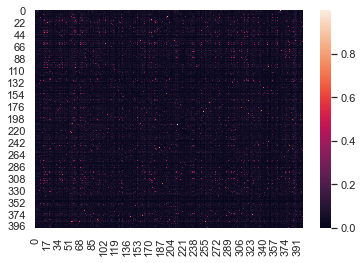

In [112]:
sns.heatmap(W)

### Rayleigh Quotient

In [113]:
def diag_reciprocal(d):
    for i in range(len(d)):
        k=(1/d[i][i])
        d[i][i]=k

In [114]:
def diag_matrix(w):     # Computes the degree of association matrix for Weight matrix W
    w1=w.copy()
    for i in range(len(w1)):
        k=0
        for j in range(len(w1)):
            k=k+w1[i][j]
            w1[i][j]=0
        w1[i][i]=k
    return w1

In [115]:
W2=W.copy()

In [116]:
for i in range(len(W2)):
    W2[i][i]=0

In [117]:
D2=diag_matrix(W2)

In [118]:
D2

array([[16.73710411,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 14.03134603,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 17.97177764, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 27.73792249,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        13.96010172,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 16.69309291]])

In [119]:
d_half=np.sqrt(D2.copy())

In [120]:
diag_reciprocal(d_half)

In [121]:
d_half     # Inverse of sqrt(D) matrix

array([[0.244433  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.26696254, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.23588726, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18987292, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.26764289,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.24475501]])

### Fiedler Vector Computation(Eigenvector corresponding to 2nd smallest Eigenvalue)

In [122]:
A= d_half@(D2-W2)@d_half

In [123]:
A.shape

(400, 400)

In [124]:
from scipy.sparse import linalg

In [125]:
 m = W2.shape[0]

In [126]:
v0 = np.random.uniform(-1,1,400)
vals, vectors = linalg.eigsh(A, which='SM', v0=v0,k=min(5, m - 2))

In [127]:
vals, vectors = np.real(vals), np.real(vectors)

In [128]:
eig_val=list(vals)

In [129]:
eig_val

[-2.27338080910326e-17,
 0.7309385441418138,
 0.7877573441075889,
 0.8175154906265277,
 0.8423853550595033]

In [130]:
z=vectors.T[1].reshape(400,1)

In [131]:
fin=d_half @ z   # calculating y vector see shi and Malik page4 eqn 9

In [132]:
fin

array([[ 1.45873512e-02],
       [ 1.23043900e-02],
       [ 1.11088924e-02],
       [ 6.11967683e-03],
       [ 1.44635100e-02],
       [ 9.01089134e-03],
       [ 5.41092464e-03],
       [ 9.92636490e-03],
       [-4.88499564e-03],
       [-3.16220695e-03],
       [ 6.63263124e-03],
       [ 8.05870243e-03],
       [-5.37469748e-03],
       [-1.89831159e-02],
       [-5.76129319e-03],
       [ 1.01191841e-02],
       [-1.77072771e-02],
       [-4.34419780e-03],
       [-1.60668571e-02],
       [-6.47086587e-03],
       [-7.95501791e-04],
       [-7.96442584e-03],
       [-2.03733101e-02],
       [-1.28580264e-02],
       [-3.34084554e-03],
       [ 1.04150715e-02],
       [-3.85916423e-03],
       [ 2.05735614e-02],
       [ 9.90477559e-03],
       [-1.97980541e-03],
       [ 1.30729826e-02],
       [-2.82536016e-03],
       [-3.82181699e-03],
       [-3.09655156e-03],
       [ 3.53123417e-03],
       [-3.12431304e-03],
       [-2.56588193e-03],
       [-1.76225150e-02],
       [ 7.2

In [133]:
lis2=[]      # stores the eigen vectors with the index of document(nodes) as per weight matrix

In [134]:
for i in range(400):
    lis2.append([fin[i][0],i])

In [135]:
lis2.sort()    # sorting the lis2 to obtain the nodes closer to one another

In [136]:
lis2

[[-0.030921847331463054, 294],
 [-0.03025045979695203, 309],
 [-0.0280913830478501, 211],
 [-0.027661926535728805, 380],
 [-0.02633949968483458, 235],
 [-0.025833059446753757, 249],
 [-0.02484326955595764, 76],
 [-0.023534558518577952, 87],
 [-0.022352339257203403, 242],
 [-0.021385265007065276, 298],
 [-0.021065566092262338, 40],
 [-0.020769970553586564, 318],
 [-0.020577825709892705, 384],
 [-0.02037331012795041, 22],
 [-0.02026769203521554, 63],
 [-0.02004150197294472, 333],
 [-0.01987152649228567, 179],
 [-0.019719098466967726, 270],
 [-0.019451700483354116, 374],
 [-0.019126339266658392, 171],
 [-0.019000939904935715, 59],
 [-0.018983115884743378, 13],
 [-0.018605830297298252, 297],
 [-0.018498896113925377, 362],
 [-0.017707277131645865, 16],
 [-0.01762251503326973, 37],
 [-0.01656424387522624, 276],
 [-0.016386360452980076, 238],
 [-0.016066857080543496, 18],
 [-0.01594649393805478, 221],
 [-0.015924661240033125, 237],
 [-0.015457926141893362, 289],
 [-0.015452083972323085, 72],


In [137]:
new_val=[]

In [138]:
new_iden=[]

In [139]:
for item in lis2:
    new_val.append(item[0])
    new_iden.append(item[1])  

In [140]:
x_=np.linspace(0,399,400)

Text(0.5, 1.0, 'Vector y value_sorted')

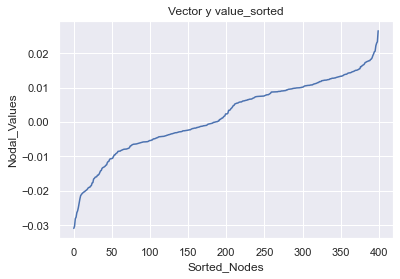

In [141]:
plt.plot(x_,new_val)
plt.xlabel('Sorted_Nodes')
plt.ylabel('Nodal_Values')
plt.title('Vector y value_sorted')

In [142]:
new_iden

[294,
 309,
 211,
 380,
 235,
 249,
 76,
 87,
 242,
 298,
 40,
 318,
 384,
 22,
 63,
 333,
 179,
 270,
 374,
 171,
 59,
 13,
 297,
 362,
 16,
 37,
 276,
 238,
 18,
 221,
 237,
 289,
 72,
 254,
 68,
 153,
 180,
 347,
 197,
 163,
 328,
 23,
 203,
 398,
 164,
 127,
 129,
 201,
 131,
 47,
 385,
 58,
 73,
 319,
 93,
 39,
 265,
 46,
 326,
 386,
 215,
 257,
 61,
 316,
 313,
 21,
 302,
 303,
 355,
 44,
 148,
 150,
 126,
 136,
 229,
 176,
 147,
 166,
 19,
 394,
 390,
 62,
 182,
 105,
 83,
 41,
 334,
 187,
 397,
 88,
 295,
 181,
 100,
 51,
 14,
 285,
 71,
 286,
 77,
 272,
 12,
 251,
 278,
 96,
 248,
 8,
 387,
 48,
 159,
 174,
 91,
 17,
 139,
 142,
 90,
 370,
 183,
 317,
 165,
 212,
 98,
 234,
 26,
 32,
 233,
 366,
 113,
 273,
 351,
 214,
 24,
 200,
 9,
 35,
 114,
 33,
 167,
 118,
 109,
 101,
 31,
 222,
 388,
 36,
 188,
 292,
 321,
 371,
 116,
 190,
 106,
 341,
 335,
 343,
 378,
 29,
 383,
 119,
 220,
 274,
 112,
 92,
 125,
 256,
 49,
 282,
 342,
 42,
 110,
 391,
 218,
 121,
 232,
 224,
 312,
 20

In [143]:
len(new_iden)

400

In [144]:
def cal_mcut(x,y):
    if np.all((x == 0)):
        return np.array([np.inf]).reshape(1,1)
    elif np.all((y == 0)):
        return np.array([np.inf]).reshape(1,1)
    else:
        try:
            return ((y @ (D2-W2) @ y.reshape((-1,1)))/ (y @ W2 @ y.reshape((-1,1)))) + ((x @ (D2-W2) @ x.reshape((-1,1)))/ (x @ W2 @ x.reshape((-1,1))))
        except ZeroDivisionError:
            return np.inf
     

In [145]:
def cal_ncut(x,y):
    if np.all((x == 0)):
        return np.array([np.inf]).reshape(1,1)
    elif np.all((y == 0)):
        return np.array([np.inf]).reshape(1,1)
    else:
        try:
            return ((y @ (D2-W2) @ y.reshape((-1,1)))/ (y @ D2 @ y.reshape((-1,1)))) + ((x @ (D2-W2) @ x.reshape((-1,1)))/ (x @ D2 @ x.reshape((-1,1))))
        except ZeroDivisionError:
            return np.inf
            
 

In [146]:
x=np.zeros(400).reshape(1,400)

In [147]:
y=np.ones(400).reshape(1,400)

In [148]:
M_cut_val=[]

In [149]:
N_cut_val=[]

In [150]:
for val in new_iden:
    x[0][val]=1
    y[0][val]=0
    M_cut_val.append(cal_mcut(x,y))
    N_cut_val.append(cal_ncut(x,y))


<ipython-input-144-98beaf0e9540>:8: RuntimeWarning: divide by zero encountered in true_divide
  return ((y @ (D2-W2) @ y.reshape((-1,1)))/ (y @ W2 @ y.reshape((-1,1)))) + ((x @ (D2-W2) @ x.reshape((-1,1)))/ (x @ W2 @ x.reshape((-1,1))))


In [151]:
M_val=[]

In [152]:
N_val=[]

In [153]:
for item in M_cut_val:
    M_val.append(item[0][0])

In [154]:
M_val

[inf,
 62.53186320030959,
 22.506469716454788,
 16.566300444498097,
 12.923927974597833,
 11.115755231218731,
 9.425313444364653,
 7.961481421855141,
 7.465271979878999,
 6.862326846355762,
 6.294525416058567,
 5.606061679451309,
 5.147720388147631,
 4.920036177816319,
 4.772031911931356,
 4.7266594037520235,
 4.572640356280328,
 4.337107044512327,
 4.0361136663378,
 3.8359774313584407,
 3.723679569537533,
 3.682979684471688,
 3.4842132457469503,
 3.376574031501868,
 3.2610189369369125,
 3.1673298864516246,
 3.1155187130467885,
 3.0237299580018036,
 3.0411180216212506,
 2.989076773665195,
 2.905427840943898,
 2.832765396168547,
 2.77798298667528,
 2.787400741974122,
 2.729196196181367,
 2.6794325884393624,
 2.6626770293455237,
 2.611639978377442,
 2.559695102797591,
 2.4925445046648136,
 2.4524222647317906,
 2.4362752412547644,
 2.4026831457801308,
 2.3955960021115352,
 2.3646418632288424,
 2.3460558232389395,
 2.3428774834611037,
 2.3219911929652226,
 2.326349485461483,
 2.31984904610

In [155]:
N_val=[]

In [156]:
for item in N_cut_val:
    N_val.append(item[0][0])

In [157]:
N_val

[1.0028882617097126,
 0.9907190708900442,
 0.9668866608087133,
 0.9557224036445,
 0.9436630395368227,
 0.936186159307824,
 0.9251780453638613,
 0.9121383118722824,
 0.9089574673865571,
 0.902897341367547,
 0.8949980717388742,
 0.8828738442658599,
 0.8737542568825768,
 0.8704940920536524,
 0.8692388947872306,
 0.870294545323664,
 0.8681388114062843,
 0.8626492010572769,
 0.8533287443104626,
 0.8475259024054886,
 0.8456732820460696,
 0.8465793414115277,
 0.8390370697732659,
 0.8361520470298435,
 0.8317235871253795,
 0.8286573088995393,
 0.8280384985465383,
 0.8243345031393061,
 0.8279813612505714,
 0.8266312039290596,
 0.8227625038726691,
 0.8203853006847879,
 0.8175936918515692,
 0.8203829503683936,
 0.818637958446821,
 0.8175328435014537,
 0.8185977842505685,
 0.8166791645157786,
 0.8151164694119255,
 0.8112763709839768,
 0.8095371583769366,
 0.8103689391316012,
 0.8095122294083158,
 0.8101800013753868,
 0.8097682277308209,
 0.8101104390453219,
 0.8118018499114018,
 0.8119955591824235,

In [158]:
indices_mcut = [i for i, x in enumerate(M_val) if x == np.inf] # to find indices where values are absurd such as inf.
indices_mcut

[0, 398, 399]

In [159]:
indices_ncut = [i for i, x in enumerate(N_val) if x == np.inf]
indices_ncut

[399]

In [160]:
# Fixing this absurd values such as inf in M_val & N_val
for ind in indices_mcut:
    if ind==0:
        M_val[ind]=M_val[ind+1]
    elif ind==len(M_val)-1:
        M_val[ind]=M_val[ind-1]
    else:
        M_val[ind]=M_val[ind-1]
        

In [161]:
for ind in indices_ncut:
    if ind==0:
        N_val[ind]=N_val[ind+1]
    elif ind==len(N_val)-1:
        N_val[ind]=N_val[ind-1]
    else:
        N_val[ind]=N_val[ind-1]

### Plot of Ncut and Mcut Values 

Text(0.5, 1.0, 'vector value')

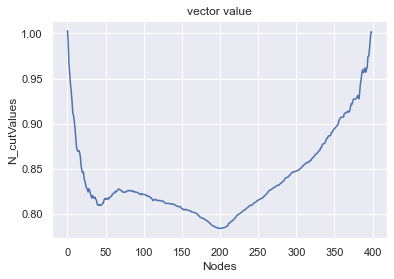

In [162]:
plt.plot(x_,N_val)
plt.xlabel('Nodes')
plt.ylabel('N_cutValues')
plt.title('vector value')

Text(0.5, 1.0, 'vector value')

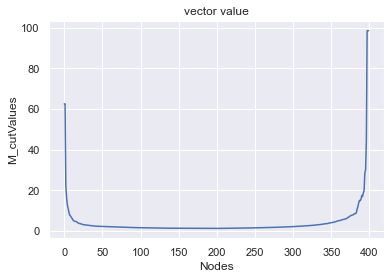

In [163]:
plt.plot(x_,M_val)
plt.xlabel('Nodes')
plt.ylabel('M_cutValues')
plt.title('vector value')

### Min value Pos

In [164]:
N_cut_minpos= N_val.index(min(N_val))
N_cut_minpos

200

In [165]:
M_cut_minpos= M_val.index(min(M_val))
M_cut_minpos

190

### Accuracy Calculation

In [166]:
all_docs[294][0],all_docs[309][0],all_docs[211][0],all_docs[380][0],all_docs[235][0]

(0, 0, 0, 0, 0)

In [167]:
y_pred_Ncut=[1]*400

In [168]:
for i in range(N_cut_minpos+1):
    y_pred_Ncut[new_iden[i]]=0

In [169]:
y_pred_Ncut

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,


In [170]:
y_pred_Mcut=[1]*400

In [171]:
for i in range(M_cut_minpos+1):
    y_pred_Mcut[new_iden[i]]=0

In [172]:
y_pred_Mcut

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,


In [173]:
ident   # Original Data Cluster Value

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,


In [174]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

### Mcut Accuracy Results

In [175]:
print(classification_report(ident,y_pred_Mcut))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       200
           1       0.95      0.99      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [176]:
accuracy_score(ident,y_pred_Mcut)

0.9675

### Ncut Accuracy Results

In [177]:
print(classification_report(ident,y_pred_Ncut))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.98      0.97      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [178]:
accuracy_score(ident,y_pred_Ncut)

0.9775

In [179]:
W_=np.zeros((400,400))

In [180]:
for i in range(W_.shape[0]):
    W_[i]=W2[new_iden[i]]

In [181]:
W_new=W_.copy()

In [182]:
for i in range(W_.shape[0]):
    for j in range(W_.shape[0]):
        W_new[i][j]=W_[i][new_iden[j]]

<AxesSubplot:>

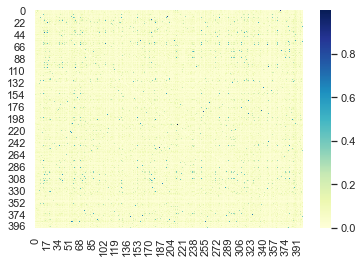

In [183]:
sns.heatmap(W2,cmap="YlGnBu")

<AxesSubplot:>

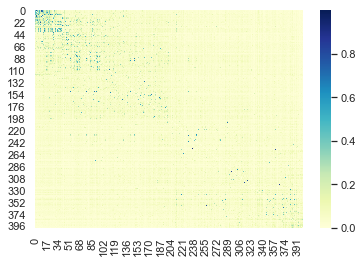

In [184]:
sns.heatmap(W_new,cmap="YlGnBu")

### Linkage based Refinement

#### Min value of M_cut

In [185]:
min_val_Mcut=M_val[M_cut_minpos]
min_val_Mcut

1.3119189398840203

#### Corresponding X vector and Y vector

In [186]:
y_vec=y_pred_Mcut

In [187]:
x_vec=[1-t for t in y_pred_Mcut ]

In [240]:
xarr=np.array(x_vec).reshape(1,400)

In [241]:
yarr=np.array(y_vec).reshape(1,400)

In [190]:
# function to calculate l(u,A)
def cal_linkage_A(W,u,x):
    return x @ W @ u.reshape(-1,1)

In [191]:
# function to calculate l(u,B)
def cal_linkage_B(W,u,y):
    return y @ W @ u.reshape(-1,1)

In [192]:
# Calculate delta_l=l(A,u)-l(B,u)
delta_l=np.zeros(400).reshape(1,400)
for i in range(400):
    u=np.zeros(400).reshape(1,400)
    u[0][i]=1
    delta_l[0][i]=cal_linkage_A(W2,u,xarr)[0][0]-cal_linkage_B(W2,u,yarr)[0][0] 

In [194]:
delta_l.shape

(1, 400)

In [195]:
# Delta_l as per sorted nodes in A and B
delta_l_sorted=np.zeros(400).reshape(1,400)
for i in range(400):
    delta_l_sorted[0][i]=delta_l[0][new_iden[i]]
    

In [196]:
x1=np.linspace(0,399,400).reshape(-1,1)

Text(0.5, 1.0, 'Linkage difference value')

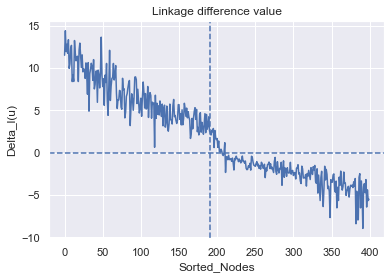

In [197]:
plt.plot(x1,delta_l_sorted.reshape(-1,1))
plt.axvline(x=M_cut_minpos,ls='--')
plt.axhline(y=0,ls='--')
plt.xlabel('Sorted_Nodes')
plt.ylabel('Delta_l(u)')
plt.title('Linkage difference value')

In [207]:
# Indicator vector s(u) is -1 if node belong to A and -1 if node belong to B
s=xarr*(-1)+yarr
s.shape

(1, 400)

In [217]:
s_mul_l=s*delta_l

In [218]:
s_mul_l

array([[-3.99040083e+00, -2.64644039e+00, -2.58321332e+00,
        -2.05128921e+00, -4.42498551e+00, -2.03172745e+00,
        -5.06773131e-01, -2.41195254e+00, -5.27379054e+00,
        -3.01527144e+00, -9.00029836e-01, -1.56410310e+00,
        -6.43191066e+00, -1.15308716e+01, -8.63764362e+00,
        -2.69898430e+00, -9.54333011e+00, -6.47773518e+00,
        -1.05998413e+01, -7.55496196e+00, -2.98126213e+00,
        -8.57959975e+00, -1.32412699e+01, -9.60493946e+00,
        -5.22341768e+00, -2.35046032e+00, -4.52872284e+00,
        -3.18180015e+00, -1.78099607e+00, -3.28606910e+00,
        -3.97516741e+00, -3.88604155e+00, -5.52518635e+00,
        -2.97447572e+00,  4.09662474e-01, -3.63522325e+00,
        -6.28260035e+00, -9.90290478e+00,  2.41261289e+00,
        -1.05349667e+01, -8.39443351e+00, -8.52047979e+00,
        -4.04983913e+00, -7.64157151e-01, -5.21567552e+00,
        -2.33737656e+00, -4.40661423e+00, -9.12595982e+00,
        -5.15342011e+00, -3.85376509e+00,  5.95894171e-0

In [219]:
# Converting s*l(u) to list with index value attached to value

In [220]:
s_l=[]
for i in range(400):
    s_l.append([s_mul_l[0][i],i])    

In [222]:
s_l.sort(reverse=True)

In [225]:
s_l

[[2.852383277787929, 246],
 [2.637649992508207, 168],
 [2.6178972259944597, 95],
 [2.471531856780828, 102],
 [2.4126128905400783, 38],
 [2.0857897553041393, 356],
 [1.7834821847863331, 357],
 [1.6697375874240628, 78],
 [1.538683342115359, 117],
 [1.3722770610103368, 130],
 [1.1780169394016315, 339],
 [0.6180473494791947, 281],
 [0.6029049874174968, 120],
 [0.40966247362224273, 34],
 [0.18661499008202398, 338],
 [0.10945491399721874, 288],
 [0.059589417072553275, 50],
 [-0.001551581886892528, 336],
 [-0.20178361353891283, 144],
 [-0.30365375054990285, 346],
 [-0.34301953465551094, 250],
 [-0.39916141077863987, 324],
 [-0.4152273278761651, 206],
 [-0.42637677062490376, 138],
 [-0.48238858734699086, 60],
 [-0.5067731307955752, 6],
 [-0.5151445590284975, 268],
 [-0.5584752258909083, 133],
 [-0.6360995578485493, 165],
 [-0.6371721247824524, 216],
 [-0.6792113785032319, 107],
 [-0.6837499064187984, 104],
 [-0.7074194736399839, 363],
 [-0.7389128677735677, 228],
 [-0.7610381117227494, 349],
 

In [226]:
new_s_l=[]
for item in s_l:
    if item[0]>0:
        new_s_l.append(item)
    else:
        break 

In [227]:
new_s_l

[[2.852383277787929, 246],
 [2.637649992508207, 168],
 [2.6178972259944597, 95],
 [2.471531856780828, 102],
 [2.4126128905400783, 38],
 [2.0857897553041393, 356],
 [1.7834821847863331, 357],
 [1.6697375874240628, 78],
 [1.538683342115359, 117],
 [1.3722770610103368, 130],
 [1.1780169394016315, 339],
 [0.6180473494791947, 281],
 [0.6029049874174968, 120],
 [0.40966247362224273, 34],
 [0.18661499008202398, 338],
 [0.10945491399721874, 288],
 [0.059589417072553275, 50]]

### Doing the swapping

In [244]:
min_val=min_val_Mcut
min_val

1.3119189398840203

In [246]:
swap_nodes=[]
for it in new_s_l:
    a=0
    if xarr[0][it[1]]==1:
        xarr[0][it[1]]=0
        yarr[0][it[1]]=1
        a=1
    else:
        xarr[0][it[1]]=1
        yarr[0][it[1]]=0
    obj=cal_mcut(xarr,yarr)[0][0]
    if obj>min_val:
        if a==1:
            xarr[0][it[1]]=1
            yarr[0][it[1]]=0
            
        else:
            xarr[0][it[1]]=0
            yarr[0][it[1]]=1
    else:
        min_val=obj
        swap_nodes.append(it[1])

In [247]:
min_val

1.311746052971297

In [242]:
cal_mcut(xarr,yarr)[0][0]

1.3119189398840203

In [248]:
swap_nodes

[168]

In [252]:
y_pred_new=yarr.reshape(-1,1).tolist()

In [253]:
y_pred_new

[[1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0]

In [254]:
accuracy_score(ident,y_pred_new)

0.97